<a href="https://colab.research.google.com/github/rajuzumaki2207/Time_series_Sequence/blob/main/TimeSeries_Airbus_shares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML/Projects/AIR.PA.csv")

In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,92.839996,94.570000,89.300003,89.889999,89.889999,1854889
1,2021-01-05,88.550003,90.540001,88.370003,89.830002,89.830002,1567333
2,2021-01-06,90.870003,90.989998,88.980003,90.169998,90.169998,1498665
3,2021-01-07,90.919998,91.000000,89.349998,89.620003,89.620003,1320055
4,2021-01-08,90.629997,90.699997,88.930000,90.099998,90.099998,1856095


In [9]:
from fbprophet import Prophet

In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,317.000000,317.000000,317.000000,317.000000,317.000000,3.170000e+02
mean,106.480694,107.925647,105.026120,106.506782,106.506782,1.663696e+06
std,8.835185,8.698622,8.816276,8.806417,8.806417,7.707787e+05
min,82.699997,84.370003,81.839996,83.110001,83.110001,1.753330e+05
25%,99.570000,101.059998,97.730003,99.570000,99.570000,1.173544e+06
50%,109.800003,111.120003,108.320000,109.779999,109.779999,1.505310e+06
75%,113.940002,115.139999,112.400002,113.720001,113.720001,1.932352e+06
max,120.000000,121.099998,117.580002,120.400002,120.400002,6.274958e+06


In [15]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [20]:
## Convert the to datetime
df["Date"] = pd.to_datetime(df.Date)

In [23]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,92.839996,94.570000,89.300003,89.889999,89.889999,1854889
1,2021-01-05,88.550003,90.540001,88.370003,89.830002,89.830002,1567333
2,2021-01-06,90.870003,90.989998,88.980003,90.169998,90.169998,1498665
3,2021-01-07,90.919998,91.000000,89.349998,89.620003,89.620003,1320055
4,2021-01-08,90.629997,90.699997,88.930000,90.099998,90.099998,1856095


In [26]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [37]:
col = [col for col in df.columns if (col !='Close') and (col != 'Date')]


['Open', 'High', 'Low', 'Adj Close', 'Volume']

In [40]:
df1 = df.drop(col, axis=1) #new df for time series prediction

In [46]:
df1.columns = ["ds", "y"] ## Y is target or closing data for Airbus share every day

In [47]:
df1.head()

,ds,y
0,2021-01-04,89.889999
1,2021-01-05,89.830002
2,2021-01-06,90.169998
3,2021-01-07,89.620003
4,2021-01-08,90.099998


In [48]:
m= Prophet(interval_width=0.95)
model = m.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
future =m.make_future_dataframe(periods=100, freq= "D")
forecast = m.predict(future)

In [52]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
411,2022-06-27,106.827194,97.080492,115.493340,104.544953,108.944215,-0.552327,-0.552327,-0.552327,-0.552327,-0.552327,-0.552327,0.0,0.0,0.0,106.274867
412,2022-06-28,106.803323,97.151772,114.726270,104.490297,108.971560,-0.516621,-0.516621,-0.516621,-0.516621,-0.516621,-0.516621,0.0,0.0,0.0,106.286702
413,2022-06-29,106.779453,98.356888,115.521829,104.441463,108.984297,0.143024,0.143024,0.143024,0.143024,0.143024,0.143024,0.0,0.0,0.0,106.922477
414,2022-06-30,106.755582,97.498977,116.473779,104.392672,109.008951,0.196121,0.196121,0.196121,0.196121,0.196121,0.196121,0.0,0.0,0.0,106.951703
415,2022-07-01,106.731712,97.420092,116.077030,104.343929,109.033839,-0.277549,-0.277549,-0.277549,-0.277549,-0.277549,-0.277549,0.0,0.0,0.0,106.454163


In [53]:
forecast[["ds", "yhat"]]

,ds,yhat
0,2021-01-04,88.241571
1,2021-01-05,88.392570
2,2021-01-06,89.167509
3,2021-01-07,89.335899
4,2021-01-08,88.977523
...,...,...
411,2022-06-27,106.274867
412,2022-06-28,106.286702
413,2022-06-29,106.922477
414,2022-06-30,106.951703


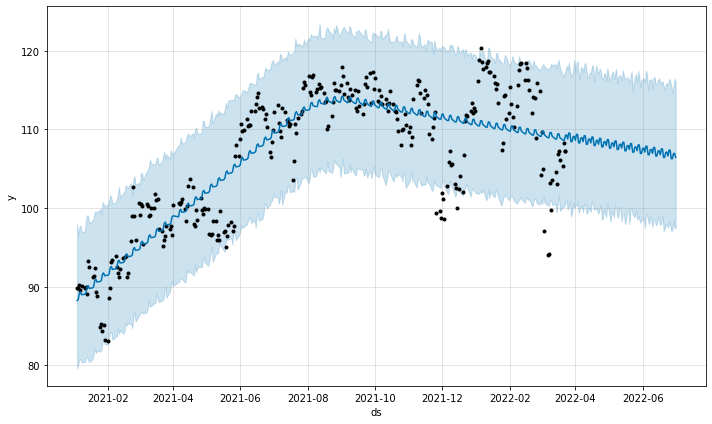

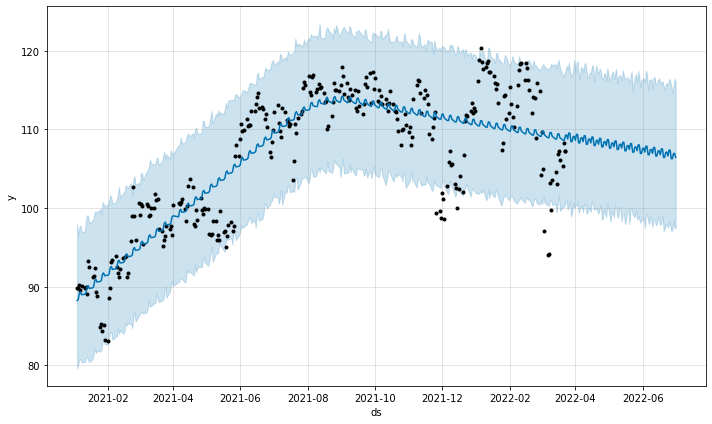

In [54]:
m.plot(forecast)

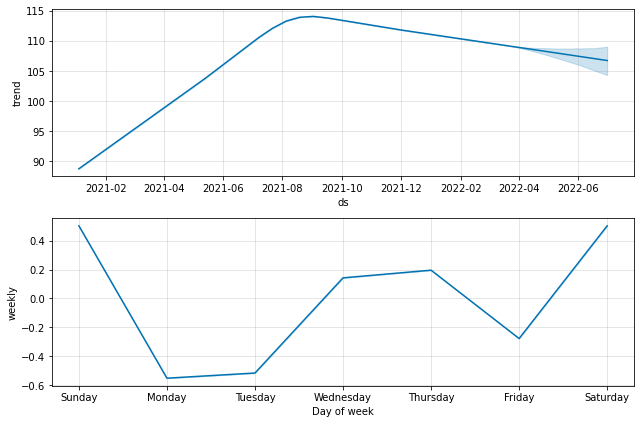

In [55]:
plot2 = m.plot_components(forecast)